<a href="https://colab.research.google.com/github/LuizHuallpa/CarteiravsIbov/blob/main/CarteiravsIbov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Código para comparação de uma carteira fictícia com mais de um aporte (e com otimização de volatilidade) vs. IBOV feito durante da Jornada Quant da plataforma trading com Dados**

**1. Instalando e importando as bibliotecas**

 Instalando Yahoo Finance

In [169]:
!pip install yfinance

Importando as bibliotecas

In [170]:
import yfinance as yf
import pandas as pd
import numpy as np

**2.Importando os dados da carteira e a cotação do USD**

In [171]:
ativos = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 
          'RADL3.SA', 'OIBR3.SA','KNRI11.SA','FLMA11.SA','BOVA11.SA',
          'SMAL11.SA','AAPL34.SA','IVVB11.SA','ETH-USD','USDBRL=X']

Periodo a ser analisado

In [172]:
inicio = '2020-05-01'
fim = '2021-11-05'

In [173]:

precos = pd.DataFrame()

for i in ativos:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Convertendo o valor do Ethereum em BRL

In [174]:
precos['ETH-BRL'] = precos['ETH-USD']*precos['USDBRL=X']

Removendo a cotação do USD e o valor do Ethereum em USD

In [175]:
precos = precos.drop(columns=['ETH-USD', 'USDBRL=X'])

In [176]:
precos.isnull().sum()

PETR4.SA     0
VALE3.SA     0
WEGE3.SA     0
RADL3.SA     0
OIBR3.SA     0
KNRI11.SA    0
FLMA11.SA    0
BOVA11.SA    0
SMAL11.SA    0
AAPL34.SA    0
IVVB11.SA    0
ETH-BRL      3
dtype: int64

In [177]:
precos = precos.dropna()

In [178]:
precos.head()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,,,
2020-05-04,15.868637,35.844715,19.638863,20.785416,0.68,156.399994,159.0,76.099998,88.010002,39.984192,169.199997,1140.169109
2020-05-05,16.379940,35.657047,19.229717,20.695963,0.70,157.000000,168.0,76.540001,86.800003,41.171108,172.240005,1145.654197
2020-05-06,15.777334,36.171097,19.140991,20.578676,0.70,160.250000,170.0,76.199997,85.800003,42.726460,174.649994,1138.243622
2020-05-07,15.923419,37.574532,19.269154,20.612471,0.67,160.000000,170.0,75.400002,84.000000,43.982609,183.000000,1213.276445
2020-05-08,16.872980,39.859192,18.850155,20.809271,0.69,162.500000,165.0,77.430000,84.099998,44.384624,180.750000,1241.468082


In [179]:
precos.loc['2021-01-04']

PETR4.SA       26.396517
VALE3.SA       77.746445
WEGE3.SA       36.920166
RADL3.SA       24.972378
OIBR3.SA        2.350000
KNRI11.SA     160.669998
FLMA11.SA     151.000000
BOVA11.SA     114.089996
SMAL11.SA     134.000000
AAPL34.SA      68.217369
IVVB11.SA     210.800003
ETH-BRL      5400.785647
Name: 2021-01-04 00:00:00, dtype: float64


**3. Simulação de uma carteira fictícia**


Alocando as ativos para a carteira

In [180]:
compras = {'PETR4.SA': 1000, 'VALE3.SA': 700, 'WEGE3.SA': 1500, 
           'RADL3.SA': 700, 'OIBR3.SA': 200, 'KNRI11.SA': 700, 'FLMA11.SA': 700, 'BOVA11.SA':1500,
           'SMAL11.SA': 1500, 'AAPL34.SA': 2000, 'IVVB11.SA': 1500, 
           'ETH-BRL': 200}     
compras_df = pd.Series(data=compras, index=list(compras.keys()))

Valor Total

In [181]:

sum(compras.values())

12200

Preços de todos os ativos no dia 0 de investimento

In [182]:
primeiro = precos.iloc[0]

Quantidade de papéis

In [183]:
qtd_acoes = compras_df/primeiro

Datarame contendo a posição diária

In [184]:
PL = precos*qtd_acoes

In [185]:
PL.head(3)

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,700.000000,1500.000000,1500.000000,2000.000000,1500.000000,200.000000
2020-05-05,1032.220974,696.335095,1468.749818,696.987459,205.882347,702.685449,739.622642,1508.672847,1479.377360,2059.369280,1526.950431,200.962154
2020-05-06,994.246332,706.373804,1461.972996,693.037541,205.882347,717.231486,748.427673,1501.971061,1462.333842,2137.167589,1548.315577,199.662245


In [186]:
PL.tail()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,,,
2021-10-27,1807.968787,1453.910226,2994.063471,773.908011,276.470585,614.961634,581.748425,2018.396917,1977.218486,4145.138307,2439.716464,3836.465126
2021-10-28,1824.983389,1439.263716,2889.424091,764.815081,264.705873,613.171379,579.767306,1983.114375,1931.030570,4268.186890,2499.113466,4162.594651
2021-10-29,1710.921957,1398.448844,2826.029241,783.000940,261.764699,607.308219,584.433962,1964.783225,1895.239079,4245.177843,2508.865293,4371.422117
2021-11-01,1764.486758,1412.314190,2822.974005,791.420305,291.176470,606.234025,594.339623,2004.599192,1960.515782,4230.171760,2518.971807,4273.690669
2021-11-03,1692.016790,1305.101774,2877.967099,803.207429,305.882339,597.506417,572.106905,2010.512524,2012.839375,4224.169250,2511.524760,4589.215761


Posição COnsolidada

In [187]:
PL['PL Total'] = PL.iloc[:].sum(axis = 1)

In [188]:
PL.head()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,700.000000,1500.000000,1500.000000,2000.000000,1500.000000,200.000000,12200.000000
2020-05-05,1032.220974,696.335095,1468.749818,696.987459,205.882347,702.685449,739.622642,1508.672847,1479.377360,2059.369280,1526.950431,200.962154,12317.815855
2020-05-06,994.246332,706.373804,1461.972996,693.037541,205.882347,717.231486,748.427673,1501.971061,1462.333842,2137.167589,1548.315577,199.662245,12376.622494
2020-05-07,1003.452213,733.781033,1471.761933,694.175651,197.058826,716.112560,748.427673,1486.202425,1431.655459,2199.999886,1622.340455,212.823946,12517.792059
2020-05-08,1063.291071,778.397436,1439.759159,700.803383,202.941174,727.301819,726.415094,1526.215543,1433.359785,2220.108617,1602.393646,217.769114,12638.755839


In [189]:
PL.tail()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,
2021-10-27,1807.968787,1453.910226,2994.063471,773.908011,276.470585,614.961634,581.748425,2018.396917,1977.218486,4145.138307,2439.716464,3836.465126,22919.966437
2021-10-28,1824.983389,1439.263716,2889.424091,764.815081,264.705873,613.171379,579.767306,1983.114375,1931.030570,4268.186890,2499.113466,4162.594651,23220.170788
2021-10-29,1710.921957,1398.448844,2826.029241,783.000940,261.764699,607.308219,584.433962,1964.783225,1895.239079,4245.177843,2508.865293,4371.422117,23157.395421
2021-11-01,1764.486758,1412.314190,2822.974005,791.420305,291.176470,606.234025,594.339623,2004.599192,1960.515782,4230.171760,2518.971807,4273.690669,23270.894585
2021-11-03,1692.016790,1305.101774,2877.967099,803.207429,305.882339,597.506417,572.106905,2010.512524,2012.839375,4224.169250,2511.524760,4589.215761,23502.050423


**Novo Aporte**

Data do novo aporte

In [190]:
data_aporte = '2020-12-10'

Carteira na data do aporte

In [191]:
PL.loc[data_aporte]

PETR4.SA      1600.722427
VALE3.SA      1411.045970
WEGE3.SA      2681.772014
RADL3.SA       825.297214
OIBR3.SA       714.705894
KNRI11.SA      688.766009
FLMA11.SA      658.176101
BOVA11.SA     2181.997355
SMAL11.SA     2241.222534
AAPL34.SA     3087.623130
IVVB11.SA     1771.276655
ETH-BRL        507.533513
PL Total     18370.138815
Name: 2020-12-10 00:00:00, dtype: float64

Dados do novo aporte

In [192]:
segunda_compra = {'VALE3.SA': 2000, 'RADL3.SA': 1000, 'FLMA11.SA': 1000}
           
segunda_compra_df = pd.Series(data=segunda_compra, index=list(segunda_compra.keys()))

In [193]:
segunda_compra_df

VALE3.SA     2000
RADL3.SA     1000
FLMA11.SA    1000
dtype: int64

In [194]:
sum(segunda_compra.values())

4000

In [195]:
precos_segundo_aporte = precos.loc[data_aporte]

In [196]:
precos_segundo_aporte

PETR4.SA       25.401283
VALE3.SA       72.255058
WEGE3.SA       35.111301
RADL3.SA       24.505922
OIBR3.SA        2.430000
KNRI11.SA     153.889999
FLMA11.SA     149.500000
BOVA11.SA     110.699997
SMAL11.SA     131.500000
AAPL34.SA      61.728058
IVVB11.SA     199.800003
ETH-BRL      2893.370167
Name: 2020-12-10 00:00:00, dtype: float64

In [197]:
qtd_acoes_segundo = segunda_compra_df/precos_segundo_aporte

In [198]:
qtd_acoes_segundo

AAPL34.SA          NaN
BOVA11.SA          NaN
ETH-BRL            NaN
FLMA11.SA     6.688963
IVVB11.SA          NaN
KNRI11.SA          NaN
OIBR3.SA           NaN
PETR4.SA           NaN
RADL3.SA     40.806462
SMAL11.SA          NaN
VALE3.SA     27.679723
WEGE3.SA           NaN
dtype: float64

In [199]:
novos_PL = pd.DataFrame(data= None, index = precos.index, columns= precos.columns)

In [200]:
novos_PL.head()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,,,
2020-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
novos_PL = precos*qtd_acoes_segundo
novos_PL = novos_PL.fillna(0)
novos_PL[novos_PL.index < data_aporte] = 0
novos_PL

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,
2020-05-04,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-05,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-06,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-07,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-08,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,0.0,0.0,0.0,883.879595,0.0,0.0,0.0,0.0,937.732489,0.0,2060.755294,0.0
2021-10-28,0.0,0.0,0.0,880.869582,0.0,0.0,0.0,0.0,926.714726,0.0,2039.995502,0.0
2021-10-29,0.0,0.0,0.0,887.959866,0.0,0.0,0.0,0.0,948.750253,0.0,1982.144982,0.0


Juntando carteira original com o que foi aportado

In [202]:
carteira_full = pd.concat([PL, novos_PL], axis = 1)

In [203]:

carteira_full

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,700.000000,1500.000000,1500.000000,2000.000000,1500.000000,200.000000,12200.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-05,1032.220974,696.335095,1468.749818,696.987459,205.882347,702.685449,739.622642,1508.672847,1479.377360,2059.369280,1526.950431,200.962154,12317.815855,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-06,994.246332,706.373804,1461.972996,693.037541,205.882347,717.231486,748.427673,1501.971061,1462.333842,2137.167589,1548.315577,199.662245,12376.622494,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-07,1003.452213,733.781033,1471.761933,694.175651,197.058826,716.112560,748.427673,1486.202425,1431.655459,2199.999886,1622.340455,212.823946,12517.792059,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-08,1063.291071,778.397436,1439.759159,700.803383,202.941174,727.301819,726.415094,1526.215543,1433.359785,2220.108617,1602.393646,217.769114,12638.755839,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,1807.968787,1453.910226,2994.063471,773.908011,276.470585,614.961634,581.748425,2018.396917,1977.218486,4145.138307,2439.716464,3836.465126,22919.966437,0.0,0.0,0.0,883.879595,0.0,0.0,0.0,0.0,937.732489,0.0,2060.755294,0.0
2021-10-28,1824.983389,1439.263716,2889.424091,764.815081,264.705873,613.171379,579.767306,1983.114375,1931.030570,4268.186890,2499.113466,4162.594651,23220.170788,0.0,0.0,0.0,880.869582,0.0,0.0,0.0,0.0,926.714726,0.0,2039.995502,0.0
2021-10-29,1710.921957,1398.448844,2826.029241,783.000940,261.764699,607.308219,584.433962,1964.783225,1895.239079,4245.177843,2508.865293,4371.422117,23157.395421,0.0,0.0,0.0,887.959866,0.0,0.0,0.0,0.0,948.750253,0.0,1982.144982,0.0


In [204]:
carteira_full.columns

Index(['PETR4.SA', 'VALE3.SA', 'WEGE3.SA', 'RADL3.SA', 'OIBR3.SA', 'KNRI11.SA',
       'FLMA11.SA', 'BOVA11.SA', 'SMAL11.SA', 'AAPL34.SA', 'IVVB11.SA',
       'ETH-BRL', 'PL Total', 'AAPL34.SA', 'BOVA11.SA', 'ETH-BRL', 'FLMA11.SA',
       'IVVB11.SA', 'KNRI11.SA', 'OIBR3.SA', 'PETR4.SA', 'RADL3.SA',
       'SMAL11.SA', 'VALE3.SA', 'WEGE3.SA'],
      dtype='object')

In [205]:
carteira_full = carteira_full.groupby(lambda x:x, axis=1).sum()
carteira_full.columns

Index(['AAPL34.SA', 'BOVA11.SA', 'ETH-BRL', 'FLMA11.SA', 'IVVB11.SA',
       'KNRI11.SA', 'OIBR3.SA', 'PETR4.SA', 'PL Total', 'RADL3.SA',
       'SMAL11.SA', 'VALE3.SA', 'WEGE3.SA'],
      dtype='object')

Visualisando apenas os papéis que foram aportados

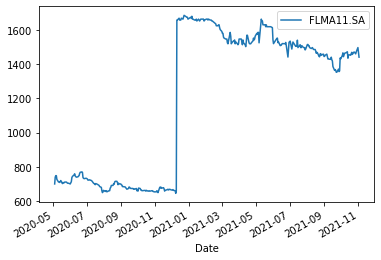

In [206]:
carteira_full[['FLMA11.SA']].plot();

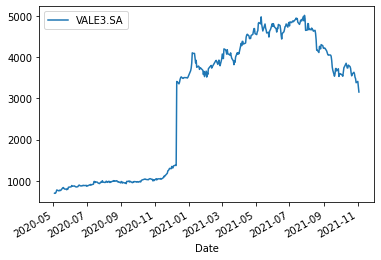

In [207]:
carteira_full[['VALE3.SA']].plot();

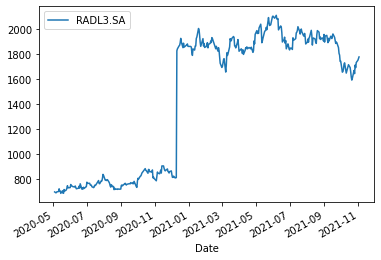

In [208]:
carteira_full[['RADL3.SA']].plot();

In [209]:
carteira_full.drop('PL Total', axis= 1, inplace = True)

In [210]:
carteira_full['PL Total'] = carteira_full.iloc[:].sum(axis = 1)

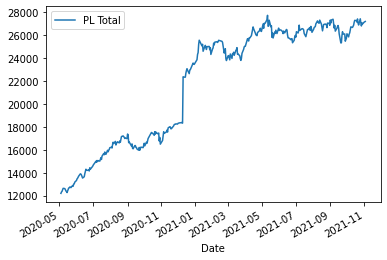

In [211]:
carteira_full[['PL Total']].plot();

In [212]:
carteira_full.drop(['PL Total'], axis = 1, inplace = True)

Dividindo o cálculo de rentavilidade entre antes e depois do aporte

Antes

In [213]:
antes_aporte = carteira_full[carteira_full.index<data_aporte]
depois_aporte = carteira_full[carteira_full.index>=data_aporte]

In [214]:
antes_aporte['PL Total'] = antes_aporte.iloc[:].sum(axis = 1)
depois_aporte['PL Total'] = depois_aporte.iloc[:].sum(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [215]:
antes_aporte.tail()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,
2020-12-03,3140.394764,2131.734633,564.291347,666.981132,1817.375919,705.907961,635.294136,1532.827003,815.899748,2237.813882,1310.778667,2792.442033,18351.741226
2020-12-04,3114.008947,2156.964570,514.440079,662.578616,1825.354589,703.043514,652.941178,1584.036320,825.968466,2241.222534,1360.912393,2711.989021,18353.460227
2020-12-07,3150.351434,2154.599207,535.113158,660.377358,1804.964626,699.104873,664.705873,1553.540882,811.201047,2250.937464,1377.014705,2704.812449,18366.723075
2020-12-08,3171.260806,2157.161721,496.185755,644.968553,1820.921965,697.583150,685.294088,1533.977641,813.886055,2246.846926,1376.184819,2745.983264,18390.254743
2020-12-09,3143.381517,2143.955299,515.018524,658.176101,1814.716318,695.076767,720.588242,1550.088609,813.886055,2215.657258,1372.864830,2681.772014,18325.181532


In [216]:
depois_aporte.head()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,
2020-12-10,3087.623130,2181.997355,507.533513,1658.176101,1771.276655,688.766009,714.705894,1600.722427,1825.297214,2241.222534,3411.045970,2681.772014,22370.138815
2020-12-11,3083.640156,2183.771415,481.015504,1658.176101,1778.812035,687.602350,694.117609,1586.337836,1840.885352,2254.857400,3405.427654,2681.772014,22336.415426
2020-12-14,3123.965618,2172.141902,520.567992,1669.267580,1783.687948,693.734042,647.058831,1589.214850,1864.638638,2254.857400,3352.857737,2664.774747,22336.767285
2020-12-15,3235.980406,2202.891019,529.069792,1658.176101,1801.418445,706.176493,691.176435,1602.448683,1869.834874,2257.584425,3390.981173,2747.871590,22693.609437
2020-12-16,3228.512855,2234.231289,566.774479,1658.176101,1802.305024,708.548610,685.294088,1622.011684,1889.134507,2290.648630,3460.004807,2768.646093,22914.288168


In [217]:
from datetime import datetime, timedelta

In [218]:
dia_antes_aporte = (datetime.strptime(data_aporte, '%Y-%m-%d')- timedelta(1)).strftime('%Y-%m-%d')

In [219]:
antes_aporte.loc[dia_antes_aporte]

AAPL34.SA     3143.381517
BOVA11.SA     2143.955299
ETH-BRL        515.018524
FLMA11.SA      658.176101
IVVB11.SA     1814.716318
KNRI11.SA      695.076767
OIBR3.SA       720.588242
PETR4.SA      1550.088609
RADL3.SA       813.886055
SMAL11.SA     2215.657258
VALE3.SA      1372.864830
WEGE3.SA      2681.772014
PL Total     18325.181532
Name: 2020-12-09 00:00:00, dtype: float64

In [220]:
pd.DataFrame(antes_aporte.loc[dia_antes_aporte]).T

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
2020-12-09,3143.381517,2143.955299,515.018524,658.176101,1814.716318,695.076767,720.588242,1550.088609,813.886055,2215.657258,1372.86483,2681.772014,18325.181532


In [221]:
pd.DataFrame(segunda_compra_df,columns = [dia_antes_aporte]).T

,VALE3.SA,RADL3.SA,FLMA11.SA
2020-12-09,2000,1000,1000


In [222]:
pd.concat([(pd.DataFrame(antes_aporte.loc[dia_antes_aporte]).T),(pd.DataFrame(segunda_compra_df,columns = [dia_antes_aporte])).T], axis = 1)

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total,VALE3.SA,RADL3.SA,FLMA11.SA
2020-12-09,3143.381517,2143.955299,515.018524,658.176101,1814.716318,695.076767,720.588242,1550.088609,813.886055,2215.657258,1372.86483,2681.772014,18325.181532,2000,1000,1000


In [223]:
operations = pd.concat([(pd.DataFrame(antes_aporte.loc[dia_antes_aporte]).T),(pd.DataFrame(segunda_compra_df,columns = [dia_antes_aporte])).T], axis = 1)

operations = operations.groupby(lambda x:x, axis=1).sum()
operations.drop(['PL Total'], axis=1, inplace=True)
operations['PL Total'] = operations.sum(axis = 1)

operations

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
2020-12-09,3143.381517,2143.955299,515.018524,1658.176101,1814.716318,695.076767,720.588242,1550.088609,1813.886055,2215.657258,3372.86483,2681.772014,22325.181532



Compare 'operations' com a útlima linha antes do aporte! Precisamos anexá-la ao dataframe do após aporte

In [224]:
depois_aporte = pd.concat([operations, depois_aporte], axis = 0)

In [225]:
depois_aporte.head()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
2020-12-09,3143.381517,2143.955299,515.018524,1658.176101,1814.716318,695.076767,720.588242,1550.088609,1813.886055,2215.657258,3372.864830,2681.772014,22325.181532
2020-12-10,3087.623130,2181.997355,507.533513,1658.176101,1771.276655,688.766009,714.705894,1600.722427,1825.297214,2241.222534,3411.045970,2681.772014,22370.138815
2020-12-11,3083.640156,2183.771415,481.015504,1658.176101,1778.812035,687.602350,694.117609,1586.337836,1840.885352,2254.857400,3405.427654,2681.772014,22336.415426
2020-12-14,3123.965618,2172.141902,520.567992,1669.267580,1783.687948,693.734042,647.058831,1589.214850,1864.638638,2254.857400,3352.857737,2664.774747,22336.767285
2020-12-15,3235.980406,2202.891019,529.069792,1658.176101,1801.418445,706.176493,691.176435,1602.448683,1869.834874,2257.584425,3390.981173,2747.871590,22693.609437


In [226]:
depois_aporte.tail()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
2021-10-27,4145.138307,2018.396917,3836.465126,1465.628020,2439.716464,614.961634,276.470585,1807.968787,1711.640500,1977.218486,3514.665520,2994.063471,26802.333815
2021-10-28,4268.186890,1983.114375,4162.594651,1460.636888,2499.113466,613.171379,264.705873,1824.983389,1691.529807,1931.030570,3479.259217,2889.424091,27067.750597
2021-10-29,4245.177843,1964.783225,4371.422117,1472.393828,2508.865293,607.308219,261.764699,1710.921957,1731.751193,1895.239079,3380.593826,2826.029241,26976.250523
2021-11-01,4230.171760,2004.599192,4273.690669,1497.349656,2518.971807,606.234025,291.176470,1764.486758,1750.372174,1960.515782,3414.111750,2822.974005,27134.654047
2021-11-03,4224.169250,2010.512524,4589.215761,1441.337654,2511.524760,597.506417,305.882339,1692.016790,1776.441575,2012.839375,3154.937714,2877.967099,27194.351258


In [227]:
rentabilidade_antes_aporte = antes_aporte.pct_change()
rentabilidade_depois_aporte = depois_aporte.pct_change()

In [228]:
rentabilidade_antes_aporte.tail()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,
2020-12-03,-0.022470,0.003712,0.032936,0.003311,-0.011334,-0.000507,0.000000,0.028174,-0.000822,0.015468,-0.011022,0.009559,0.001198
2020-12-04,-0.008402,0.011835,-0.088343,-0.006601,0.004390,-0.004058,0.027778,0.033408,0.012341,0.001523,0.038247,-0.028811,0.000094
2020-12-07,0.011671,-0.001097,0.040186,-0.003322,-0.011170,-0.005602,0.018018,-0.019252,-0.017879,0.004335,0.011832,-0.002646,0.000723
2020-12-08,0.006637,0.001189,-0.072746,-0.023333,0.008841,-0.002177,0.030973,-0.012593,0.003310,-0.001817,-0.000603,0.015221,0.001281
2020-12-09,-0.008791,-0.006122,0.037955,0.020478,-0.003408,-0.003593,0.051502,0.010503,0.000000,-0.013882,-0.002412,-0.023384,-0.003538


In [229]:
rentabilidade_depois_aporte.head()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-10,-0.017738,0.017744,-0.014533,0.000000,-0.023937,-0.009079,-0.008163,0.032665,0.006291,0.011538,0.011320,0.000000,0.002014
2020-12-11,-0.001290,0.000813,-0.052249,0.000000,0.004254,-0.001689,-0.028807,-0.008986,0.008540,0.006084,-0.001647,0.000000,-0.001508
2020-12-14,0.013077,-0.005325,0.082227,0.006689,0.002741,0.008917,-0.067797,0.001814,0.012903,0.000000,-0.015437,-0.006338,0.000016
2020-12-15,0.035857,0.014156,0.016332,-0.006645,0.009940,0.017935,0.068182,0.008327,0.002787,0.001209,0.011370,0.031183,0.015976


In [230]:
rentabilidade_antes_aporte = rentabilidade_antes_aporte.dropna()
rentabilidade_depois_aporte = rentabilidade_depois_aporte.dropna()

In [231]:
rentabilidade_total = pd.concat([rentabilidade_antes_aporte, rentabilidade_depois_aporte], axis = 0)

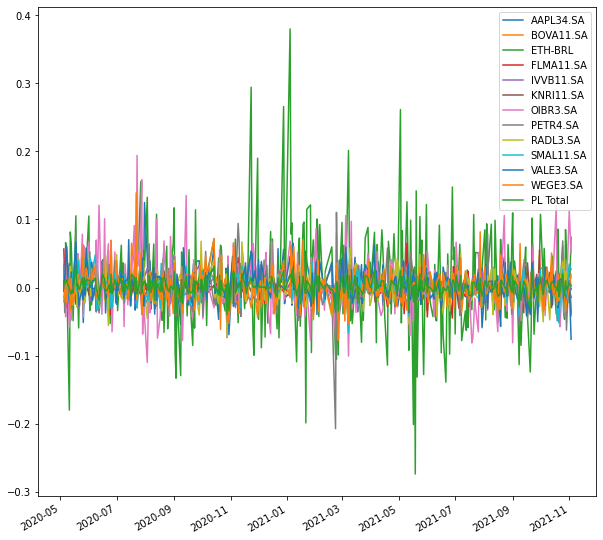

In [232]:
rentabilidade_total.plot(figsize = (10,10));

In [233]:
cum_daily_return = (1 + rentabilidade_total).cumprod()

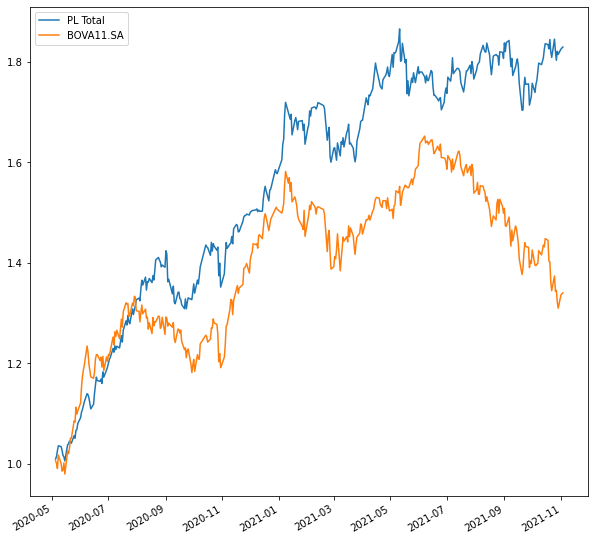

In [234]:
cum_daily_return[['PL Total', 'BOVA11.SA']].plot(figsize = (10,10));

In [235]:
cum_daily_return.tail()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
2021-10-27,2.072569,1.345598,19.182326,0.831069,1.626478,0.878517,1.382353,1.807969,1.097155,1.318146,2.043689,1.996042,1.803292
2021-10-28,2.134093,1.322076,20.812973,0.828239,1.666076,0.875959,1.323529,1.824983,1.084264,1.287354,2.023101,1.926283,1.821150
2021-10-29,2.122589,1.309855,21.857111,0.834906,1.672577,0.867583,1.308823,1.710922,1.110046,1.263493,1.965730,1.884019,1.814993
2021-11-01,2.115086,1.336399,21.368453,0.849057,1.679315,0.866049,1.455882,1.764487,1.121982,1.307011,1.985220,1.881983,1.825651
2021-11-03,2.112085,1.340342,22.946079,0.817296,1.674350,0.853581,1.529412,1.692017,1.138693,1.341893,1.834516,1.918645,1.829667


**Considerando pesos do último dia como os oficiais**

In [236]:
carteira_full.shape

(371, 12)

In [237]:
carteira_full.iloc[321]

AAPL34.SA    4037.095425
BOVA11.SA    2228.318107
ETH-BRL      3131.866252
FLMA11.SA    1445.774347
IVVB11.SA    2332.358166
KNRI11.SA     623.196980
OIBR3.SA      338.235284
PETR4.SA     1702.729750
RADL3.SA     1973.823941
SMAL11.SA    2316.213906
VALE3.SA     4114.088206
WEGE3.SA     2729.187621
Name: 2021-08-23 00:00:00, dtype: float64

In [238]:
sum(carteira_full.iloc[321])

26972.887984008034

In [239]:
pesos = carteira_full.iloc[321]/sum(carteira_full.iloc[321])

In [240]:
type(pesos)

pandas.core.series.Series

In [241]:
pesos_novo = np.array(pesos.T)
pesos_novo

array([0.14967235, 0.08261326, 0.11611164, 0.05360102, 0.08647046,
       0.02310457, 0.01253982, 0.06312745, 0.07317807, 0.08587193,
       0.1525268 , 0.10118263])

In [242]:
rentabilidades_diarias = rentabilidade_total*pesos

**Otimização de Risco - Portfólio de Mínima Variância**

Instalar PyPortfolio

In [243]:
pip install git+https://github.com/robertmartin8/PyPortfolioOpt

  Cloning https://github.com/robertmartin8/PyPortfolioOpt to /tmp/pip-req-build-x8zepyj0
  Running command git clone -q https://github.com/robertmartin8/PyPortfolioOpt /tmp/pip-req-build-x8zepyj0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.8 MB 30.9 MB/s 
  Created wheel for pyportfolioopt: filename=PyPortfolioOpt-1.5.1-py3-none-any.whl size=61313 sha256=94c12cec08c37a99f00bcdda99a5c44885353914f1f07061ea01990ea10cb8fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-pg1udhmh/wheels/cd/d3/75/98b790a90e1312874fc303d02cef66fda52219f521652b70c9
Successfully built pyportfolioopt
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [244]:
rentabilidade_precos = precos.pct_change()
cov_matrix = rentabilidade_precos.cov()
cov_matrix

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
PETR4.SA,7.386793e-04,0.000224,1.406734e-04,0.000148,0.000307,0.000013,0.000018,0.000278,0.000250,-0.000026,2.219464e-07,0.000224
VALE3.SA,2.244091e-04,0.000465,7.116564e-05,0.000018,0.000114,0.000009,0.000021,0.000152,0.000106,0.000057,5.463198e-05,0.000273
WEGE3.SA,1.406734e-04,0.000071,5.881605e-04,0.000176,0.000155,0.000012,0.000014,0.000164,0.000174,0.000067,6.772696e-07,0.000183
RADL3.SA,1.482563e-04,0.000018,1.757061e-04,0.000422,0.000113,0.000004,-0.000006,0.000142,0.000164,0.000002,-3.056464e-05,0.000219
OIBR3.SA,3.073824e-04,0.000114,1.547293e-04,0.000113,0.001544,0.000029,-0.000003,0.000223,0.000272,0.000012,-4.175322e-05,0.000195
KNRI11.SA,1.334204e-05,0.000009,1.182560e-05,0.000004,0.000029,0.000072,0.000010,0.000008,0.000013,0.000012,4.854706e-06,0.000011
FLMA11.SA,1.791651e-05,0.000021,1.444210e-05,-0.000006,-0.000003,0.000010,0.000148,0.000009,0.000005,0.000024,9.075227e-06,0.000079
BOVA11.SA,2.780358e-04,0.000152,1.644299e-04,0.000142,0.000223,0.000008,0.000009,0.000204,0.000209,0.000002,-9.079861e-06,0.000154
SMAL11.SA,2.498966e-04,0.000106,1.742617e-04,0.000164,0.000272,0.000013,0.000005,0.000209,0.000293,-0.000030,-2.853395e-05,0.000104
AAPL34.SA,-2.551347e-05,0.000057,6.708342e-05,0.000002,0.000012,0.000012,0.000024,0.000002,-0.000030,0.000469,1.809242e-04,0.000141


Calculando a volatilidade

In [245]:
vol_atual = np.sqrt(np.dot(pesos_novo.T, np.dot(cov_matrix,pesos_novo)))
vol_atual = vol_atual*np.sqrt(252)
vol_atual

0.22040167804166197

Framework de Otimização - Matriz de Covariancia Estimada

In [246]:
from pypfopt import risk_models
sample_cov = risk_models.CovarianceShrinkage(precos).ledoit_wolf()

Retorno Médio Estimado

In [247]:
from pypfopt import expected_returns

In [248]:
retorno_medio = expected_returns.mean_historical_return(precos)

Construindo o objeto de otimização

In [249]:
from pypfopt import EfficientFrontier

In [250]:
mv = EfficientFrontier(retorno_medio, sample_cov)

In [251]:
mv.min_volatility()
pesos_vol = mv.clean_weights()
pesos_vol

OrderedDict([('PETR4.SA', 0.0),
             ('VALE3.SA', 0.00853),
             ('WEGE3.SA', 0.00288),
             ('RADL3.SA', 0.06595),
             ('OIBR3.SA', 0.00188),
             ('KNRI11.SA', 0.37734),
             ('FLMA11.SA', 0.20381),
             ('BOVA11.SA', 0.08655),
             ('SMAL11.SA', 0.03698),
             ('AAPL34.SA', 0.0),
             ('IVVB11.SA', 0.21606),
             ('ETH-BRL', 0.0)])

Extraindo os pesos

In [252]:
pesos_vol = pesos_vol.values()
pesos_vol = list(pesos_vol)
pesos_vol = np.array(pesos_vol)
pesos_vol

array([0.     , 0.00853, 0.00288, 0.06595, 0.00188, 0.37734, 0.20381,
       0.08655, 0.03698, 0.     , 0.21606, 0.     ])

Calculando a Volatilidade Pós-Otimização

In [253]:
vol_otimizada = np.sqrt(np.dot(pesos_vol.T, np.dot(cov_matrix, pesos_vol)))
vol_otimizada = vol_otimizada * np.sqrt(252)
vol_otimizada

0.09487387829254895

**Comparando desempenho das carteiras vs Ibov**

In [254]:
renta_carteira_antes = (rentabilidade_precos * pesos_novo).sum(axis=1)
renta_carteira_depois = (rentabilidade_precos * pesos_vol).sum(axis=1)

In [255]:
carteira_antes_acm = (1+renta_carteira_antes).cumprod()
carteira_depois_acm = (1+renta_carteira_depois).cumprod()

In [256]:
ibov = yf.download('^BVSP', start=inicio, end=fim)['Adj Close']
ibov_retornos = ibov.pct_change()
ibov_acm = (1+ibov_retornos).cumprod()

[*********************100%***********************]  1 of 1 completed


In [257]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(name='IBOV', x=ibov_acm.index, y=ibov_acm))
fig.add_trace(go.Scatter(name='Carteira Normal', x=carteira_antes_acm.index, y=carteira_antes_acm))
fig.add_trace(go.Scatter(name='Carteira MV', x=carteira_depois_acm.index, y=carteira_depois_acm))
fig.update_layout(title_text='Comparação Carteira')
fig.show()

In [258]:
from pypfopt import objective_functions

In [259]:
mv_2 = EfficientFrontier(retorno_medio, sample_cov)
mv_2.add_objective(objective_functions.L2_reg, gamma=0.15)
mv_2.min_volatility()
pesos_2 = mv_2.clean_weights()
pesos_2

OrderedDict([('PETR4.SA', 0.0313),
             ('VALE3.SA', 0.07145),
             ('WEGE3.SA', 0.05438),
             ('RADL3.SA', 0.08918),
             ('OIBR3.SA', 0.02665),
             ('KNRI11.SA', 0.17569),
             ('FLMA11.SA', 0.15777),
             ('BOVA11.SA', 0.08029),
             ('SMAL11.SA', 0.07867),
             ('AAPL34.SA', 0.08618),
             ('IVVB11.SA', 0.14602),
             ('ETH-BRL', 0.00242)])

In [260]:
pesos_2 = pesos_2.values()
pesos_2 = list(pesos_2)
pesos_2 = np.array(pesos_2)
pesos_2

array([0.0313 , 0.07145, 0.05438, 0.08918, 0.02665, 0.17569, 0.15777,
       0.08029, 0.07867, 0.08618, 0.14602, 0.00242])

In [261]:
renta_carteira_depois_2 = (rentabilidade_precos *pesos_2).sum(axis=1)
carteira_depois_acm_2 = (1+renta_carteira_depois_2).cumprod()

In [262]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(name='IBOV', x=ibov_acm.index, y=ibov_acm))
fig.add_trace(go.Scatter(name='Carteira Normal', x=carteira_antes_acm.index, y=carteira_antes_acm))
fig.add_trace(go.Scatter(name='Carteira MV', x=carteira_depois_acm.index, y=carteira_depois_acm))
fig.add_trace(go.Scatter(name='Carteira MV2',x=carteira_depois_acm_2.index, y=carteira_depois_acm_2))
fig.update_layout(title_text='Comparação Carteira')
fig.show()